# Unit 2: Q-Learning with FrozenLake-v1 ⛄ and Taxi-v3 🚕

<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit3/thumbnail.jpg" alt="Unit 2 Thumbnail">

In this notebook, **you'll code your first Reinforcement Learning agent from scratch** to play FrozenLake ❄️ using Q-Learning, share it with the community, and experiment with different configurations.

⬇️ Here is an example of what **you will achieve in just a couple of minutes.** ⬇️


<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit3/envs.gif" alt="Environments"/>

###🎮 Environments:

- [FrozenLake-v1](https://gymnasium.farama.org/environments/toy_text/frozen_lake/)
- [Taxi-v3](https://gymnasium.farama.org/environments/toy_text/taxi/)

###📚 RL-Library:

- Python and NumPy
- [Gymnasium](https://gymnasium.farama.org/)

We're constantly trying to improve our tutorials, so **if you find some issues in this notebook**, please [open an issue on the GitHub Repo](https://github.com/huggingface/deep-rl-class/issues).

## Objectives of this notebook 🏆

At the end of the notebook, you will:

- Be able to use **Gymnasium**, the environment library.
- Be able to code a Q-Learning agent from scratch.
- Be able to **push your trained agent and the code to the Hub** with a nice video replay and an evaluation score 🔥.




## This notebook is from the Deep Reinforcement Learning Course

<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/notebooks/deep-rl-course-illustration.jpg" alt="Deep RL Course illustration"/>

In this free course, you will:

- 📖 Study Deep Reinforcement Learning in **theory and practice**.
- 🧑‍💻 Learn to **use famous Deep RL libraries** such as Stable Baselines3, RL Baselines3 Zoo, CleanRL and Sample Factory 2.0.
- 🤖 Train **agents in unique environments**

And more check 📚 the syllabus 👉 https://simoninithomas.github.io/deep-rl-course

Don’t forget to **<a href="http://eepurl.com/ic5ZUD">sign up to the course</a>** (we are collecting your email to be able to **send you the links when each Unit is published and give you information about the challenges and updates).**


The best way to keep in touch is to join our discord server to exchange with the community and with us 👉🏻 https://discord.gg/ydHrjt3WP5

## Prerequisites 🏗️

Before diving into the notebook, you need to:

🔲 📚 **Study [Q-Learning by reading Unit 2](https://huggingface.co/deep-rl-course/unit2/introduction)**  🤗  

## A small recap of Q-Learning

*Q-Learning* **is the RL algorithm that**:

- Trains *Q-Function*, an **action-value function** that encoded, in internal memory, by a *Q-table* **that contains all the state-action pair values.**

- Given a state and action, our Q-Function **will search the Q-table for the corresponding value.**
    
<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit3/Q-function-2.jpg" alt="Q function"  width="100%"/>

- When the training is done,**we have an optimal Q-Function, so an optimal Q-Table.**
    
- And if we **have an optimal Q-function**, we
have an optimal policy, since we **know for, each state, the best action to take.**

<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit3/link-value-policy.jpg" alt="Link value policy"  width="100%"/>


But, in the beginning, our **Q-Table is useless since it gives arbitrary value for each state-action pair (most of the time we initialize the Q-Table to 0 values)**. But, as we’ll explore the environment and update our Q-Table it will give us better and better approximations

<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/notebooks/unit2/q-learning.jpeg" alt="q-learning.jpeg" width="100%"/>

This is the Q-Learning pseudocode:

<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit3/Q-learning-2.jpg" alt="Q-Learning" width="100%"/>


# Let's code our first Reinforcement Learning algorithm 🚀

To validate this hands-on for the [certification process](https://huggingface.co/deep-rl-course/en/unit0/introduction#certification-process), you need to push your trained Taxi model to the Hub and **get a result of >= 4.5**.

To find your result, go to the [leaderboard](https://huggingface.co/spaces/huggingface-projects/Deep-Reinforcement-Learning-Leaderboard) and find your model, **the result = mean_reward - std of reward**

For more information about the certification process, check this section 👉 https://huggingface.co/deep-rl-course/en/unit0/introduction#certification-process

## Install dependencies and create a virtual display 🔽

In the notebook, we'll need to generate a replay video. To do so, with Colab, **we need to have a virtual screen to render the environment** (and thus record the frames).

Hence the following cell will install the libraries and create and run a virtual screen 🖥

We’ll install multiple ones:

- `gymnasium`: Contains the FrozenLake-v1 ⛄ and Taxi-v3 🚕 environments.
- `pygame`: Used for the FrozenLake-v1 and Taxi-v3 UI.
- `numpy`: Used for handling our Q-table.

The Hugging Face Hub 🤗 works as a central place where anyone can share and explore models and datasets. It has versioning, metrics, visualizations and other features that will allow you to easily collaborate with others.

You can see here all the Deep RL models available (if they use Q Learning) here 👉 https://huggingface.co/models?other=q-learning

In [1]:
# !pip install -r https://raw.githubusercontent.com/huggingface/deep-rl-class/main/notebooks/unit2/requirements-unit2.txt

In [2]:
# !sudo apt-get update
# !sudo apt-get install -y python3-opengl
# !apt install ffmpeg xvfb
# !pip3 install pyvirtualdisplay

To make sure the new installed libraries are used, **sometimes it's required to restart the notebook runtime**. The next cell will force the **runtime to crash, so you'll need to connect again and run the code starting from here**. Thanks to this trick, **we will be able to run our virtual screen.**

In [3]:
# import os
# os.kill(os.getpid(), 9)

In [4]:
# Virtual display
# from pyvirtualdisplay import Display

# virtual_display = Display(visible=0, size=(1400, 900))
# virtual_display.start()

## Import the packages 📦

In addition to the installed libraries, we also use:

- `random`: To generate random numbers (that will be useful for epsilon-greedy policy).
- `imageio`: To generate a replay video.

In [22]:
import numpy as np
import gymnasium as gym
import random
import imageio
import os
import tqdm

# import pickle5 as pickle
from tqdm import tqdm

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

We're now ready to code our Q-Learning algorithm 🔥

# Part 1: Frozen Lake ⛄ (non slippery version)

## Create and understand [FrozenLake environment ⛄]((https://gymnasium.farama.org/environments/toy_text/frozen_lake/)
---

💡 A good habit when you start to use an environment is to check its documentation

👉 https://gymnasium.farama.org/environments/toy_text/frozen_lake/

---

We're going to train our Q-Learning agent **to navigate from the starting state (S) to the goal state (G) by walking only on frozen tiles (F) and avoid holes (H)**.

We can have two sizes of environment:

- `map_name="4x4"`: a 4x4 grid version
- `map_name="8x8"`: a 8x8 grid version


The environment has two modes:

- `is_slippery=False`: The agent always moves **in the intended direction** due to the non-slippery nature of the frozen lake (deterministic).
- `is_slippery=True`: The agent **may not always move in the intended direction** due to the slippery nature of the frozen lake (stochastic).

For now let's keep it simple with the 4x4 map and non-slippery.
We add a parameter called `render_mode` that specifies how the environment should be visualised. In our case because we **want to record a video of the environment at the end, we need to set render_mode to rgb_array**.

As [explained in the documentation](https://gymnasium.farama.org/api/env/#gymnasium.Env.render) “rgb_array”: Return a single frame representing the current state of the environment. A frame is a np.ndarray with shape (x, y, 3) representing RGB values for an x-by-y pixel image.

In [7]:
# Create the FrozenLake-v1 environment using 4x4 map and non-slippery version and render_mode="rgb_array"
env = gym.make("FrozenLake-v1", map_name="4x4", is_slippery=False, render_mode="rgb_array") # TODO use the correct parameters

### Solution

In [ ]:
env = gym.make("FrozenLake-v1", map_name="4x4", is_slippery=False, render_mode="rgb_array")

You can create your own custom grid like this:

```python
desc=["SFFF", "FHFH", "FFFH", "HFFG"]
gym.make('FrozenLake-v1', desc=desc, is_slippery=True)
```

but we'll use the default environment for now.

### Let's see what the Environment looks like:


In [8]:
# We create our environment with gym.make("<name_of_the_environment>")- `is_slippery=False`: The agent always moves in the intended direction due to the non-slippery nature of the frozen lake (deterministic).
print("_____OBSERVATION SPACE_____ \n")
print("Observation Space", env.observation_space)
print("Sample observation", env.observation_space.sample()) # Get a random observation

_____OBSERVATION SPACE_____ 

Observation Space Discrete(16)
Sample observation 13


We see with `Observation Space Shape Discrete(16)` that the observation is an integer representing the **agent’s current position as current_row * ncols + current_col (where both the row and col start at 0)**.

For example, the goal position in the 4x4 map can be calculated as follows: 3 * 4 + 3 = 15. The number of possible observations is dependent on the size of the map. **For example, the 4x4 map has 16 possible observations.**


For instance, this is what state = 0 looks like:

<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/notebooks/unit2/frozenlake.png" alt="FrozenLake">

In [9]:
print("\n _____ACTION SPACE_____ \n")
print("Action Space Shape", env.action_space.n)
print("Action Space Sample", env.action_space.sample()) # Take a random action


 _____ACTION SPACE_____ 

Action Space Shape 4
Action Space Sample 3


The action space (the set of possible actions the agent can take) is discrete with 4 actions available 🎮:
- 0: GO LEFT
- 1: GO DOWN
- 2: GO RIGHT
- 3: GO UP

Reward function 💰:
- Reach goal: +1
- Reach hole: 0
- Reach frozen: 0

## Create and Initialize the Q-table 🗄️

(👀 Step 1 of the pseudocode)

<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit3/Q-learning-2.jpg" alt="Q-Learning" width="100%"/>


It's time to initialize our Q-table! To know how many rows (states) and columns (actions) to use, we need to know the action and observation space. We already know their values from before, but we'll want to obtain them programmatically so that our algorithm generalizes for different environments. Gym provides us a way to do that: `env.action_space.n` and `env.observation_space.n`


In [10]:
state_space = env.observation_space.n
print("There are ", state_space, " possible states")

action_space = env.action_space.n
print("There are ", action_space, " possible actions")

There are  16  possible states
There are  4  possible actions


In [11]:
# Let's create our Qtable of size (state_space, action_space) and initialized each values at 0 using np.zeros. np.zeros needs a tuple (a,b)
#       -----------------
#       | L | R | U | D |
#  ----------------------
#  | S0 | 0 | 0 | 0 | 0 |
#  ----------------------
#  | S1 | 0 | 0 | 0 | 0 |
#  ----------------------
#  | S2 | 0 | 0 | 0 | 0 |
#  ----------------------
#  | S3 | 0 | 0 | 0 | 0 |
#  ----------------------
#  .
#  .
#  .
#  -----------------------
#  | S12 | 0 | 0 | 0 | 0 |
#  -----------------------
#  | S13 | 0 | 0 | 0 | 0 |
#  -----------------------
#  | S14 | 0 | 0 | 0 | 0 |
#  -----------------------
#  | S15 | 0 | 0 | 0 | 0 |
#  -----------------------
def initialize_q_table(state_space, action_space):
  Qtable = np.zeros((state_space, action_space))
  return Qtable

In [12]:
Qtable_frozenlake = initialize_q_table(state_space, action_space)

### Solution

In [13]:
state_space = env.observation_space.n
print("There are ", state_space, " possible states")

action_space = env.action_space.n
print("There are ", action_space, " possible actions")

There are  16  possible states
There are  4  possible actions


In [14]:
# Let's create our Qtable of size (state_space, action_space) and initialized each values at 0 using np.zeros
def initialize_q_table(state_space, action_space):
  Qtable = np.zeros((state_space, action_space))
  return Qtable

In [15]:
Qtable_frozenlake = initialize_q_table(state_space, action_space)

## Define the greedy policy 🤖

Remember we have two policies since Q-Learning is an **off-policy** algorithm. This means we're using a **different policy for acting and updating the value function**.

- Epsilon-greedy policy (acting policy)
- Greedy-policy (updating policy)

The greedy policy will also be the final policy we'll have when the Q-learning agent completes training. The greedy policy is used to select an action using the Q-table.

<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit3/off-on-4.jpg" alt="Q-Learning" width="100%"/>


In [16]:
def greedy_policy(Qtable, state):
  # Exploitation: take the action with the highest state, action value
  action = np.argmax(Qtable[state][:])

  return action

#### Solution

In [ ]:
def greedy_policy(Qtable, state):
  # Exploitation: take the action with the highest state, action value
  action = np.argmax(Qtable[state][:])

  return action

##Define the epsilon-greedy policy 🤖

Epsilon-greedy is the training policy that handles the exploration/exploitation trade-off.

The idea with epsilon-greedy:

- With *probability 1 - ɛ* : **we do exploitation** (i.e. our agent selects the action with the highest state-action pair value).

- With *probability ɛ*: we do **exploration** (trying a random action).

As the training continues, we progressively **reduce the epsilon value since we will need less and less exploration and more exploitation.**

<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit3/Q-learning-4.jpg" alt="Q-Learning" width="100%"/>


In [17]:
def epsilon_greedy_policy(Qtable, state, epsilon):
  # Randomly generate a number between 0 and 1
  random_num = random.uniform(0.0, 1.0)
  # if random_num > greater than epsilon --> exploitation
  if random_num > epsilon:
    # Take the action with the highest value given a state
    # np.argmax can be useful here
    action = greedy_policy(Qtable, state) # We can do np.argmax(Qtable[state][:]) but don't repeat code.
  # else --> exploration
  else:
    action = env.action_space.sample() # Take a random action

  return action

#### Solution

In [ ]:
def epsilon_greedy_policy(Qtable, state, epsilon):
  # Randomly generate a number between 0 and 1
  random_num = random.uniform(0,1)
  # if random_num > greater than epsilon --> exploitation
  if random_num > epsilon:
    # Take the action with the highest value given a state
    # np.argmax can be useful here
    action = greedy_policy(Qtable, state)
  # else --> exploration
  else:
    action = env.action_space.sample()

  return action

## Define the hyperparameters ⚙️

The exploration related hyperparamters are some of the most important ones.

- We need to make sure that our agent **explores enough of the state space** to learn a good value approximation. To do that, we need to have progressive decay of the epsilon.
- If you decrease epsilon too fast (too high decay_rate), **you take the risk that your agent will be stuck**, since your agent didn't explore enough of the state space and hence can't solve the problem.

In [18]:
# Training parameters
n_training_episodes = 10000  # Total training episodes
learning_rate = 0.7          # Learning rate

# Evaluation parameters
n_eval_episodes = 100        # Total number of test episodes

# Environment parameters
env_id = "FrozenLake-v1"     # Name of the environment
max_steps = 99               # Max steps per episode
gamma = 0.95                 # Discounting rate
eval_seed = []               # The evaluation seed of the environment

# Exploration parameters
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.05            # Minimum exploration probability
decay_rate = 0.0005            # Exponential decay rate for exploration prob

## Create the training loop method

<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit3/Q-learning-2.jpg" alt="Q-Learning" width="100%"/>

The training loop goes like this:

```
For episode in the total of training episodes:

Reduce epsilon (since we need less and less exploration)
Reset the environment

  For step in max timesteps:    
    Choose the action At using epsilon greedy policy
    Take the action (a) and observe the outcome state(s') and reward (r)
    Update the Q-value Q(s,a) using Bellman equation Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
    If done, finish the episode
    Our next state is the new state
```

In [19]:
xaxis_with = []
yaxis_with = []

xaxis_without = []
yaxis_without = []

In [20]:
def train(n_training_episodes, min_epsilon, max_epsilon, decay_rate, env, max_steps, Qtable):
  xaxis_with = []
  yaxis_with = []

  xaxis_without = []
  yaxis_without = []

  for episode in tqdm(range(n_training_episodes)):
    # Reduce epsilon (because we need less and less exploration)
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode) # What is this: -decay_rate*episode
    xaxis_with.append(episode)
    yaxis_with.append(epsilon)

    temp_epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate)
    xaxis_without.append(episode)
    yaxis_without.append(temp_epsilon)

    # Reset the environment
    state, info = env.reset()
    step = 0
    terminated = False
    truncated = False

    # repeat
    for step in range(max_steps):
      # Choose the action At using epsilon greedy policy
      action = epsilon_greedy_policy(Qtable, state, epsilon)

      # Take action At and observe Rt+1 and St+1
      # Take the action (a) and observe the outcome state(s') and reward (r)
      new_state, reward, terminated, truncated, info = env.step(action=action)

      # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
      # Why using this: np.max(Qtable[new_state]) is different from using this: np.argmax(Qtable[new_state][:])?
      Qtable[state][action] = Qtable[state][action] + learning_rate * (reward + gamma * np.max(Qtable[new_state]) - Qtable[state][action])

      # If terminated or truncated finish the episode
      if terminated or truncated:
        break

      # Our next state is the new state
      state = new_state
  return Qtable

#### Solution

In [ ]:
def train(n_training_episodes, min_epsilon, max_epsilon, decay_rate, env, max_steps, Qtable):
  for episode in tqdm(range(n_training_episodes)):
    # Reduce epsilon (because we need less and less exploration)
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)
    # Reset the environment
    state, info = env.reset()
    step = 0
    terminated = False
    truncated = False

    # repeat
    for step in range(max_steps):
      # Choose the action At using epsilon greedy policy
      action = epsilon_greedy_policy(Qtable, state, epsilon)

      # Take action At and observe Rt+1 and St+1
      # Take the action (a) and observe the outcome state(s') and reward (r)
      new_state, reward, terminated, truncated, info = env.step(action)

      # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
      Qtable[state][action] = Qtable[state][action] + learning_rate * (reward + gamma * np.max(Qtable[new_state]) - Qtable[state][action])

      # If terminated or truncated finish the episode
      if terminated or truncated:
        break

      # Our next state is the new state
      state = new_state
  return Qtable

## Train the Q-Learning agent 🏃

In [23]:
Qtable_frozenlake = train(n_training_episodes, min_epsilon, max_epsilon, decay_rate, env, max_steps, Qtable_frozenlake)

100%|██████████| 10000/10000 [00:01<00:00, 7545.46it/s]


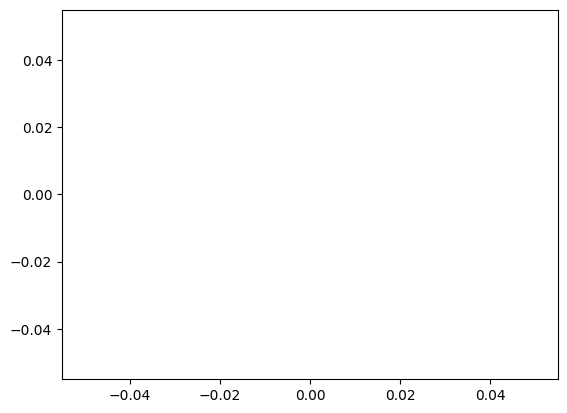

In [24]:
plt.plot(xaxis_with, yaxis_with)

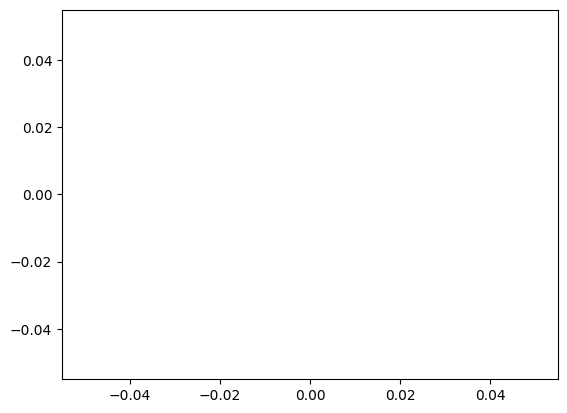

In [25]:
plt.plot(xaxis_without, yaxis_without)

## Let's see what our Q-Learning table looks like now 👀

In [26]:
pd.DataFrame(Qtable_frozenlake).head(n=16)

,0,1,2,3
0,0.735092,0.773781,0.773781,0.735092
1,0.735092,0.000000,0.814506,0.773781
2,0.773781,0.857375,0.773781,0.814506
3,0.814506,0.000000,0.773781,0.773781
4,0.773781,0.814506,0.000000,0.735092
5,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.902500,0.000000,0.814506
7,0.000000,0.000000,0.000000,0.000000
8,0.814506,0.000000,0.857375,0.773781
9,0.814506,0.902500,0.902500,0.000000


## The evaluation method 📝

- We defined the evaluation method that we're going to use to test our Q-Learning agent.

In [27]:
def evaluate_agent(env, max_steps, n_eval_episodes, Q, seed):
  """
  Evaluate the agent for ``n_eval_episodes`` episodes and returns average reward and std of reward.
  :param env: The evaluation environment
  :param max_steps: Maximum number of steps per episode
  :param n_eval_episodes: Number of episode to evaluate the agent
  :param Q: The Q-table
  :param seed: The evaluation seed array (for taxi-v3)
  """
  episode_rewards = []
  for episode in tqdm(range(n_eval_episodes)):
    if seed:
      state, info = env.reset(seed=seed[episode])
    else:
      state, info = env.reset()
    step = 0
    truncated = False
    terminated = False
    total_rewards_ep = 0

    for step in range(max_steps):
      # Take the action (index) that have the maximum expected future reward given that state
      action = greedy_policy(Q, state)
      new_state, reward, terminated, truncated, info = env.step(action)
      total_rewards_ep += reward

      if terminated or truncated:
        break
      state = new_state
    episode_rewards.append(total_rewards_ep)
  mean_reward = np.mean(episode_rewards)
  std_reward = np.std(episode_rewards)

  return mean_reward, std_reward

## Evaluate our Q-Learning agent 📈

- Usually, you should have a mean reward of 1.0
- The **environment is relatively easy** since the state space is really small (16). What you can try to do is [to replace it with the slippery version](https://gymnasium.farama.org/environments/toy_text/frozen_lake/), which introduces stochasticity, making the environment more complex.

In [28]:
# Evaluate our Agent
mean_reward, std_reward = evaluate_agent(env, max_steps, n_eval_episodes, Qtable_frozenlake, eval_seed)
print(f"Mean_reward={mean_reward:.2f} +/- {std_reward:.2f}")

100%|██████████| 100/100 [00:00<00:00, 11108.97it/s]

Mean_reward=1.00 +/- 0.00


## Publish our trained model to the Hub 🔥

Now that we saw good results after the training, **we can publish our trained model to the Hub 🤗 with one line of code**.

Here's an example of a Model Card:

<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/notebooks/unit2/modelcard.png" alt="Model card" width="100%"/>


Under the hood, the Hub uses git-based repositories (don't worry if you don't know what git is), which means you can update the model with new versions as you experiment and improve your agent.

#### Do not modify this code

In [67]:
from huggingface_hub import HfApi, snapshot_download
from huggingface_hub.repocard import metadata_eval_result, metadata_save

from pathlib import Path
import datetime
import json

In [68]:
def record_video(env, Qtable, out_directory, fps=1):
  """
  Generate a replay video of the agent
  :param env
  :param Qtable: Qtable of our agent
  :param out_directory
  :param fps: how many frame per seconds (with taxi-v3 and frozenlake-v1 we use 1)
  """
  images = []
  terminated = False
  truncated = False
  state, info = env.reset(seed=random.randint(0,500))
  img = env.render()
  images.append(img)
  while not terminated or truncated:
    # Take the action (index) that have the maximum expected future reward given that state
    action = np.argmax(Qtable[state][:])
    state, reward, terminated, truncated, info = env.step(action) # We directly put next_state = state for recording logic
    img = env.render()
    images.append(img)
  imageio.mimsave(out_directory, [np.array(img) for i, img in enumerate(images)], fps=fps)

In [69]:
def push_to_hub(
    repo_id, model, env, video_fps=1, local_repo_path="hub"
):
    """
    Evaluate, Generate a video and Upload a model to Hugging Face Hub.
    This method does the complete pipeline:
    - It evaluates the model
    - It generates the model card
    - It generates a replay video of the agent
    - It pushes everything to the Hub

    :param repo_id: repo_id: id of the model repository from the Hugging Face Hub
    :param env
    :param video_fps: how many frame per seconds to record our video replay
    (with taxi-v3 and frozenlake-v1 we use 1)
    :param local_repo_path: where the local repository is
    """
    _, repo_name = repo_id.split("/")

    eval_env = env
    api = HfApi()

    # Step 1: Create the repo
    repo_url = api.create_repo(
        repo_id=repo_id,
        exist_ok=True,
    )

    # Step 2: Download files
    repo_local_path = Path(snapshot_download(repo_id=repo_id))

    # Step 3: Save the model
    if env.spec.kwargs.get("map_name"):
        model["map_name"] = env.spec.kwargs.get("map_name")
        if env.spec.kwargs.get("is_slippery", "") == False:
            model["slippery"] = False

    # Pickle the model
    with open((repo_local_path) / "q-learning.pkl", "wb") as f:
        pickle.dump(model, f)

    # Step 4: Evaluate the model and build JSON with evaluation metrics
    mean_reward, std_reward = evaluate_agent(
        eval_env, model["max_steps"], model["n_eval_episodes"], model["qtable"], model["eval_seed"]
    )

    evaluate_data = {
        "env_id": model["env_id"],
        "mean_reward": mean_reward,
        "n_eval_episodes": model["n_eval_episodes"],
        "eval_datetime": datetime.datetime.now().isoformat()
    }

    # Write a JSON file called "results.json" that will contain the
    # evaluation results
    with open(repo_local_path / "results.json", "w") as outfile:
        json.dump(evaluate_data, outfile)

    # Step 5: Create the model card
    env_name = model["env_id"]
    if env.spec.kwargs.get("map_name"):
        env_name += "-" + env.spec.kwargs.get("map_name")

    if env.spec.kwargs.get("is_slippery", "") == False:
        env_name += "-" + "no_slippery"

    metadata = {}
    metadata["tags"] = [env_name, "q-learning", "reinforcement-learning", "custom-implementation"]

    # Add metrics
    eval = metadata_eval_result(
        model_pretty_name=repo_name,
        task_pretty_name="reinforcement-learning",
        task_id="reinforcement-learning",
        metrics_pretty_name="mean_reward",
        metrics_id="mean_reward",
        metrics_value=f"{mean_reward:.2f} +/- {std_reward:.2f}",
        dataset_pretty_name=env_name,
        dataset_id=env_name,
    )

    # Merges both dictionaries
    metadata = {**metadata, **eval}

    model_card = f"""
  # **Q-Learning** Agent playing1 **{env_id}**
  This is a trained model of a **Q-Learning** agent playing **{env_id}** .

  ## Usage

  ```python

  model = load_from_hub(repo_id="{repo_id}", filename="q-learning.pkl")

  # Don't forget to check if you need to add additional attributes (is_slippery=False etc)
  env = gym.make(model["env_id"])
  ```
  """

    evaluate_agent(env, model["max_steps"], model["n_eval_episodes"], model["qtable"], model["eval_seed"])

    readme_path = repo_local_path / "README.md"
    readme = ""
    print(readme_path.exists())
    if readme_path.exists():
        with readme_path.open("r", encoding="utf8") as f:
            readme = f.read()
    else:
        readme = model_card

    with readme_path.open("w", encoding="utf-8") as f:
        f.write(readme)

    # Save our metrics to Readme metadata
    metadata_save(readme_path, metadata)

    # Step 6: Record a video
    video_path = repo_local_path / "replay.mp4"
    record_video(env, model["qtable"], video_path, video_fps)

    # Step 7. Push everything to the Hub
    api.upload_folder(
        repo_id=repo_id,
        folder_path=repo_local_path,
        path_in_repo=".",
    )

    print("Your model is pushed to the Hub. You can view your model here: ", repo_url)

### .

By using `push_to_hub` **you evaluate, record a replay, generate a model card of your agent and push it to the Hub**.

This way:
- You can **showcase our work** 🔥
- You can **visualize your agent playing** 👀
- You can **share an agent with the community that others can use** 💾
- You can **access a leaderboard 🏆 to see how well your agent is performing compared to your classmates** 👉 https://huggingface.co/spaces/huggingface-projects/Deep-Reinforcement-Learning-Leaderboard


To be able to share your model with the community there are three more steps to follow:

1️⃣ (If it's not already done) create an account to HF ➡ https://huggingface.co/join

2️⃣ Sign in and then, you need to store your authentication token from the Hugging Face website.
- Create a new token (https://huggingface.co/settings/tokens) **with write role**


<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/notebooks/create-token.jpg" alt="Create HF Token">


In [26]:
from huggingface_hub import notebook_login
notebook_login()

If you don't want to use a Google Colab or a Jupyter Notebook, you need to use this command instead: `huggingface-cli login` (or `login`)

3️⃣ We're now ready to push our trained agent to the 🤗 Hub 🔥 using `push_to_hub()` function

- Let's create **the model dictionary that contains the hyperparameters and the Q_table**.

In [70]:
model = {
    "env_id": env_id,
    "max_steps": max_steps,
    "n_training_episodes": n_training_episodes,
    "n_eval_episodes": n_eval_episodes,
    "eval_seed": eval_seed,

    "learning_rate": learning_rate,
    "gamma": gamma,

    "max_epsilon": max_epsilon,
    "min_epsilon": min_epsilon,
    "decay_rate": decay_rate,

    "qtable": Qtable_frozenlake
}

Let's fill the `push_to_hub` function:

- `repo_id`: the name of the Hugging Face Hub Repository that will be created/updated `
(repo_id = {username}/{repo_name})`
💡 A good `repo_id` is `{username}/q-{env_id}`
- `model`: our model dictionary containing the hyperparameters and the Qtable.
- `env`: the environment.
- `commit_message`: message of the commit

In [71]:
model

{'env_id': 'FrozenLake-v1',
 'max_steps': 99,
 'n_training_episodes': 10000,
 'n_eval_episodes': 100,
 'eval_seed': [],
 'learning_rate': 0.7,
 'gamma': 0.95,
 'max_epsilon': 1.0,
 'min_epsilon': 0.05,
 'decay_rate': 0.0005,
 'qtable': array([[0.73509189, 0.77378094, 0.77378094, 0.73509189],
        [0.73509189, 0.        , 0.81450625, 0.77378094],
        [0.77378094, 0.857375  , 0.77378094, 0.81450625],
        [0.81450625, 0.        , 0.77378094, 0.77378094],
        [0.77378094, 0.81450625, 0.        , 0.73509189],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.9025    , 0.        , 0.81450625],
        [0.        , 0.        , 0.        , 0.        ],
        [0.81450625, 0.        , 0.857375  , 0.77378094],
        [0.81450625, 0.9025    , 0.9025    , 0.        ],
        [0.857375  , 0.95      , 0.        , 0.857375  ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.

In [72]:
username = "k0T0z" # FILL THIS
repo_name = "q-FrozenLake-v1-4x4-noSlippery"
push_to_hub(
    repo_id=f"{username}/{repo_name}",
    model=model,
    env=env)

Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

True


q-learning.pkl:   0%|          | 0.00/914 [00:00<?, ?B/s]

Your model is pushed to the Hub. You can view your model here:  https://huggingface.co/k0T0z/q-FrozenLake-v1-4x4-noSlippery


Congrats 🥳 you've just implemented from scratch, trained, and uploaded your first Reinforcement Learning agent.
FrozenLake-v1 no_slippery is very simple environment, let's try a harder one 🔥.

# Part 2: Taxi-v3 🚖

## Create and understand [Taxi-v3 🚕](https://gymnasium.farama.org/environments/toy_text/taxi/)
---

💡 A good habit when you start to use an environment is to check its documentation

👉 https://gymnasium.farama.org/environments/toy_text/taxi/

---

In `Taxi-v3` 🚕, there are four designated locations in the grid world indicated by R(ed), G(reen), Y(ellow), and B(lue).

When the episode starts, **the taxi starts off at a random square** and the passenger is at a random location. The taxi drives to the passenger’s location, **picks up the passenger**, drives to the passenger’s destination (another one of the four specified locations), and then **drops off the passenger**. Once the passenger is dropped off, the episode ends.


<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/notebooks/unit2/taxi.png" alt="Taxi">


In [ ]:
env = gym.make("Taxi-v3", render_mode="rgb_array")

There are **500 discrete states since there are 25 taxi positions, 5 possible locations of the passenger** (including the case when the passenger is in the taxi), and **4 destination locations.**


In [ ]:
state_space = env.observation_space.n
print("There are ", state_space, " possible states")

There are  500  possible states


In [ ]:
action_space = env.action_space.n
print("There are ", action_space, " possible actions")

There are  6  possible actions


The action space (the set of possible actions the agent can take) is discrete with **6 actions available 🎮**:

- 0: move south
- 1: move north
- 2: move east
- 3: move west
- 4: pickup passenger
- 5: drop off passenger

Reward function 💰:

- -1 per step unless other reward is triggered.
- +20 delivering passenger.
- -10 executing “pickup” and “drop-off” actions illegally.

In [ ]:
# Create our Q table with state_size rows and action_size columns (500x6)
Qtable_taxi = initialize_q_table(state_space, action_space)
print(Qtable_taxi)
print("Q-table shape: ", Qtable_taxi .shape)

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
Q-table shape:  (500, 6)


## Define the hyperparameters ⚙️

⚠ DO NOT MODIFY EVAL_SEED: the eval_seed array **allows us to evaluate your agent with the same taxi starting positions for every classmate**

In [ ]:
# Training parameters
n_training_episodes = 1000000 # 25000   # Total training episodes
learning_rate = 0.7           # Learning rate

# Evaluation parameters
n_eval_episodes = 100        # Total number of test episodes

# DO NOT MODIFY EVAL_SEED
eval_seed = [16,54,165,177,191,191,120,80,149,178,48,38,6,125,174,73,50,172,100,148,146,6,25,40,68,148,49,167,9,97,164,176,61,7,54,55,
 161,131,184,51,170,12,120,113,95,126,51,98,36,135,54,82,45,95,89,59,95,124,9,113,58,85,51,134,121,169,105,21,30,11,50,65,12,43,82,145,152,97,106,55,31,85,38,
 112,102,168,123,97,21,83,158,26,80,63,5,81,32,11,28,148] # Evaluation seed, this ensures that all classmates agents are trained on the same taxi starting position
                                                          # Each seed has a specific starting state

# Environment parameters
env_id = "Taxi-v3"           # Name of the environment
max_steps = 99               # Max steps per episode
gamma = 0.90 # 0.95                 # Discounting rate

# Exploration parameters
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.0 # 0.05           # Minimum exploration probability
decay_rate = 0.0005 # 0.005            # Exponential decay rate for exploration prob


## Train our Q-Learning agent 🏃

In [ ]:
Qtable_taxi = train(n_training_episodes, min_epsilon, max_epsilon, decay_rate, env, max_steps, Qtable_taxi)

  0%|          | 0/1000000 [00:00<?, ?it/s]

In [ ]:
pd.DataFrame(Qtable_taxi).head(n=10)

,0,1,2,3,4,5
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.585682,0.460353,-0.585682,0.460353,1.622615,-8.539647
2,4.348907,5.943230,4.348907,5.943230,7.714700,-3.056770
3,0.460353,1.622615,0.460353,1.622615,2.914016,-7.377385
4,-6.763270,-6.847003,-4.996845,-6.726025,-15.651289,-15.034039
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,-4.996845,-5.811808,-5.288239,-5.819660,-14.577970,-14.562592
7,-3.136962,-4.984301,-5.479871,-4.520433,-12.897541,-13.234485
8,1.622615,0.460344,-0.589894,0.460134,-8.712683,-8.539716
9,-2.374403,-3.136972,-3.827781,-3.136969,-12.137402,-12.136964


## Create a model dictionary 💾 and publish our trained model to the Hub 🔥

- We create a model dictionary that will contain all the training hyperparameters for reproducibility and the Q-Table.


In [ ]:
model = {
    "env_id": env_id,
    "max_steps": max_steps,
    "n_training_episodes": n_training_episodes,
    "n_eval_episodes": n_eval_episodes,
    "eval_seed": eval_seed,

    "learning_rate": learning_rate,
    "gamma": gamma,

    "max_epsilon": max_epsilon,
    "min_epsilon": min_epsilon,
    "decay_rate": decay_rate,

    "qtable": Qtable_taxi
}

In [ ]:
username = "k0T0z" # FILL THIS
repo_name = "q-Taxi-v3-500" # FILL THIS
push_to_hub(
    repo_id=f"{username}/{repo_name}",
    model=model,
    env=env)

Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

(…)5aef724d9ca559c78813d8d2b4e86a/README.md:   0%|          | 0.00/738 [00:00<?, ?B/s]

(…)aef724d9ca559c78813d8d2b4e86a/replay.mp4:   0%|          | 0.00/123k [00:00<?, ?B/s]

(…)f724d9ca559c78813d8d2b4e86a/results.json:   0%|          | 0.00/113 [00:00<?, ?B/s]

q-learning.pkl:   0%|          | 0.00/24.6k [00:00<?, ?B/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

True


q-learning.pkl:   0%|          | 0.00/24.6k [00:00<?, ?B/s]

Your model is pushed to the Hub. You can view your model here:  https://huggingface.co/k0T0z/q-Taxi-v3-500


Now that it's on the Hub, you can compare the results of your Taxi-v3 with your classmates using the leaderboard 🏆 👉 https://huggingface.co/spaces/huggingface-projects/Deep-Reinforcement-Learning-Leaderboard


<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/notebooks/unit2/taxi-leaderboard.png" alt="Taxi Leaderboard">

# Part 3: Load from Hub 🔽

What's amazing with Hugging Face Hub 🤗 is that you can easily load powerful models from the community.

Loading a saved model from the Hub is really easy:

1. You go https://huggingface.co/models?other=q-learning to see the list of all the q-learning saved models.
2. You select one and copy its repo_id

<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/notebooks/unit2/copy-id.png" alt="Copy id">

3. Then we just need to use `load_from_hub` with:
- The repo_id
- The filename: the saved model inside the repo.

#### Do not modify this code

In [73]:
from urllib.error import HTTPError

from huggingface_hub import hf_hub_download


def load_from_hub(repo_id: str, filename: str) -> str:
    """
    Download a model from Hugging Face Hub.
    :param repo_id: id of the model repository from the Hugging Face Hub
    :param filename: name of the model zip file from the repository
    """
    # Get the model from the Hub, download and cache the model on your local disk
    pickle_model = hf_hub_download(
        repo_id=repo_id,
        filename=filename
    )

    with open(pickle_model, 'rb') as f:
      downloaded_model_file = pickle.load(f)

    return downloaded_model_file

### .

In [ ]:
model = load_from_hub(repo_id="k0T0z/q-Taxi-v3-500", filename="q-learning.pkl")

# Don't forget to check if you need to add additional attributes (is_slippery=False etc)
env = gym.make(model["env_id"])

evaluate_agent(env, model["max_steps"], model["n_eval_episodes"], model["qtable"], model["eval_seed"])

q-learning.pkl:   0%|          | 0.00/24.6k [00:00<?, ?B/s]

  0%|          | 0/100 [00:00<?, ?it/s]

(7.52, 2.7293955374771173)

In [ ]:
model = load_from_hub(repo_id="ThomasSimonini/q-Taxi-v3", filename="q-learning.pkl") # Try to use another model

print(model)
env = gym.make(model["env_id"])

evaluate_agent(env, model["max_steps"], model["n_eval_episodes"], model["qtable"], model["eval_seed"])

{'env_id': 'Taxi-v3', 'max_steps': 99, 'n_training_episodes': 25000, 'n_eval_episodes': 100, 'eval_seed': [16, 54, 165, 177, 191, 191, 120, 80, 149, 178, 48, 38, 6, 125, 174, 73, 50, 172, 100, 148, 146, 6, 25, 40, 68, 148, 49, 167, 9, 97, 164, 176, 61, 7, 54, 55, 161, 131, 184, 51, 170, 12, 120, 113, 95, 126, 51, 98, 36, 135, 54, 82, 45, 95, 89, 59, 95, 124, 9, 113, 58, 85, 51, 134, 121, 169, 105, 21, 30, 11, 50, 65, 12, 43, 82, 145, 152, 97, 106, 55, 31, 85, 38, 112, 102, 168, 123, 97, 21, 83, 158, 26, 80, 63, 5, 81, 32, 11, 28, 148], 'learning_rate': 0.7, 'gamma': 0.95, 'epsilon': 1.0, 'max_epsilon': 1.0, 'min_epsilon': 0.05, 'decay_rate': 0.005, 'qtable': array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 2.75200369,  3.94947757,  2.75200369,  3.94947757,  5.20997639,
        -5.05052243],
       [ 7.93349184,  9.40367562,  7.93349184,  9.40367562, 10.9512375 ,
         0.40367562],
       ...,
       [10.9512375 , 12.58025   , 10

  0%|          | 0/100 [00:00<?, ?it/s]

(7.56, 2.706732347314747)

In [74]:
model = load_from_hub(repo_id="k0T0z/q-FrozenLake-v1-4x4-noSlippery", filename="q-learning.pkl")

# Don't forget to check if you need to add additional attributes (is_slippery=False etc)
env = gym.make(model["env_id"])

evaluate_agent(env, model["max_steps"], model["n_eval_episodes"], model["qtable"], model["eval_seed"])

q-learning.pkl:   0%|          | 0.00/914 [00:00<?, ?B/s]

  0%|          | 0/100 [00:00<?, ?it/s]

(0.07, 0.25514701644346144)

In [75]:
model = load_from_hub(repo_id="ThomasSimonini/q-FrozenLake-v1-no-slippery", filename="q-learning.pkl") # Try to use another model

env = gym.make(model["env_id"], is_slippery=False)

evaluate_agent(env, model["max_steps"], model["n_eval_episodes"], model["qtable"], model["eval_seed"])

  0%|          | 0/100 [00:00<?, ?it/s]

(1.0, 0.0)

## Some additional challenges 🏆

The best way to learn **is to try things on your own**! As you saw, the current agent is not doing great. As a first suggestion, you can train for more steps. With 1,000,000 steps, we saw some great results!

In the [Leaderboard](https://huggingface.co/spaces/huggingface-projects/Deep-Reinforcement-Learning-Leaderboard) you will find your agents. Can you get to the top?

Here are some ideas to climb up the leaderboard:

* Train more steps
* Try different hyperparameters by looking at what your classmates have done.
* **Push your new trained model** on the Hub 🔥

Are walking on ice and driving taxis too boring to you? Try to **change the environment**, why not use FrozenLake-v1 slippery version? Check how they work [using the gymnasium documentation](https://gymnasium.farama.org/) and have fun 🎉.

_____________________________________________________________________
Congrats 🥳, you've just implemented, trained, and uploaded your first Reinforcement Learning agent.

Understanding Q-Learning is an **important step to understanding value-based methods.**

In the next Unit with Deep Q-Learning, we'll see that while creating and updating a Q-table was a good strategy — **however, it is not scalable.**

For instance, imagine you create an agent that learns to play Doom.

<img src="https://vizdoom.cs.put.edu.pl/user/pages/01.tutorial/basic.png" alt="Doom"/>

Doom is a large environment with a huge state space (millions of different states). Creating and updating a Q-table for that environment would not be efficient.

That's why we'll study Deep Q-Learning in the next unit, an algorithm **where we use a neural network that approximates, given a state, the different Q-values for each action.**

<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit4/atari-envs.gif" alt="Environments"/>


See you in Unit 3! 🔥

## Keep learning, stay awesome 🤗